In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Earliest Date:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [14]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
# Calculate the date 1 year ago from the last data point in the database
#>>>> The date one year prior to the last listed date is: 2016-08-23

# Perform a query to retrieve the data (temperature observations?) and precipitation scores
data_12mo = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23').\
        order_by(Measurement.date).all()

data_12mo

[('2016-08-23', 81.0, 0.0),
 ('2016-08-23', 76.0, 0.15),
 ('2016-08-23', 80.0, 0.05),
 ('2016-08-23', 80.0, None),
 ('2016-08-23', 80.0, 0.02),
 ('2016-08-23', 77.0, 1.79),
 ('2016-08-23', 74.0, 0.7),
 ('2016-08-24', 79.0, 0.08),
 ('2016-08-24', 76.0, 2.15),
 ('2016-08-24', 80.0, 2.28),
 ('2016-08-24', 78.0, None),
 ('2016-08-24', 79.0, 1.22),
 ('2016-08-24', 77.0, 2.15),
 ('2016-08-24', 74.0, 1.45),
 ('2016-08-25', 80.0, 0.08),
 ('2016-08-25', 77.0, 0.08),
 ('2016-08-25', 81.0, 0.0),
 ('2016-08-25', 81.0, 0.0),
 ('2016-08-25', 80.0, 0.21),
 ('2016-08-25', 80.0, 0.06),
 ('2016-08-25', 77.0, 0.11),
 ('2016-08-26', 79.0, 0.0),
 ('2016-08-26', 78.0, 0.03),
 ('2016-08-26', 81.0, 0.02),
 ('2016-08-26', 81.0, 0.04),
 ('2016-08-26', 84.0, 0.0),
 ('2016-08-26', 80.0, 0.01),
 ('2016-08-27', 77.0, 0.0),
 ('2016-08-27', 73.0, 0.18),
 ('2016-08-27', 81.0, 0.02),
 ('2016-08-27', 81.0, 0.0),
 ('2016-08-27', 75.0, 0.12),
 ('2016-08-27', 74.0, None),
 ('2016-08-28', 78.0, 0.01),
 ('2016-08-28', 73.0, 

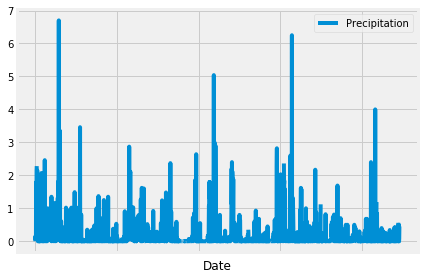

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_12mo_df = pd.DataFrame(data_12mo, columns = ['Date', 'Temperature','Precipitation'])
data_12mo_df.set_index('Date', inplace = True)
# Sort the dataframe by date
# >>>> should already be sorted? I did an orderby.... confused...

# Use Pandas Plotting with Matplotlib to plot the data
data_12mo_df['Precipitation'].plot()
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
precip_dict = data_12mo_df['Precipitation'].to_dict()
precip_dict

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': nan,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_12mo_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [19]:
session.query(Station.id, Station.station, Station.name).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'USC00517948', 'PEARL CITY, HI US'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count = func.count(Measurement.id)
sel = [Measurement.station, count]

stations_data_count = session.query(*sel).group_by(Measurement.station).order_by(count.desc()).all()
stations_data_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

temps = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
temps

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station:
temp_data_12mo = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= '2016-08-23').\
        filter(Measurement.station == 'USC00519281').\
        order_by(Measurement.date).all()

temp_data_12mo

temps = [item[1] for item in temp_data_12mo]
max_temp = max(temps)
max_temp

83.0

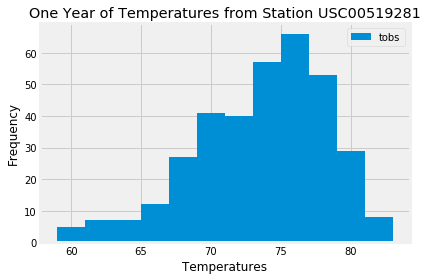

In [24]:
# plot the results as a histogram:
# , histtype = 'bar', align = 'mid', orientation = 'vertical',, data = temps
ax = plt.hist(temps, bins = 12)
plt.title('One Year of Temperatures from Station USC00519281')
# bbox_to_anchor=(1.18, 1)
plt.legend(["tobs"], loc = "upper right")
plt.ylabel("Frequency")
plt.xlabel("Temperatures")
plt.tight_layout()
plt.show()

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
def start_calc_temps(start_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %y-%m-%d
        end_date (string): A date string in the format %y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    start_date = start_date.replace(" ", "-")
    if start_date >= '2010-01-01' and start_date <= '2017-08-23':
        output = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= '2017-08-23').all()
        temperatures = output[0]

        return [temperatures[0],temperatures[1],temperatures[2]]
    
print(start_calc_temps('2016-07-04'))

[58.0, 74.98349705304518, 87.0]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#######################################

travel_temps = calc_temps('2016-08-20', '2016-09-01')
temp_tuple = travel_temps[0]
ptps =  temp_tuple[2]-temp_tuple[0]
ptps

13.0

NameError: name 'fig' is not defined

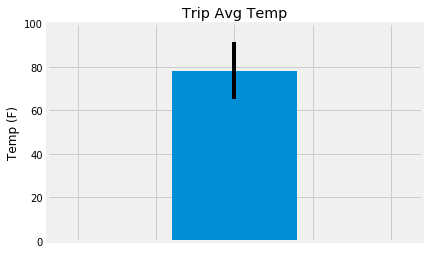

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(1,temp_tuple[1], yerr = ptps)
plt.margins(1,1)
plt.ylim(0,100)
plt.tick_params(
    axis='x',
    labelbottom=False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
fig.tight_layout()
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_rainfall_by_station = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
        filter(Station.station == Measurement.station).\
        filter(Measurement.date >= '2016-08-20').\
        filter(Measurement.date <= '2016-09-01').\
        group_by(Station.station).\
        order_by(Measurement.prcp.desc()).all()

trip_rainfall_by_station

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
